# 🍕 Estimación de π usando Monte Carlo y Ciencia de Datos
Este notebook muestra cómo estimar el número π utilizando simulaciones Monte Carlo aplicadas sobre una imagen circular. La idea se basa en lanzar puntos aleatorios dentro de una imagen con un círculo blanco inscrito en un cuadrado y verificar qué proporción de ellos cae dentro del círculo.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw

# Crear imagen con un círculo blanco perfecto inscrito en fondo negro
def create_perfect_circle_image(path="circle.png", size=500):
    img = Image.new("L", (size, size), 0)
    draw = ImageDraw.Draw(img)
    draw.ellipse((0, 0, size, size), fill=255)
    img.save(path)
    return path

circle_image_path = create_perfect_circle_image()


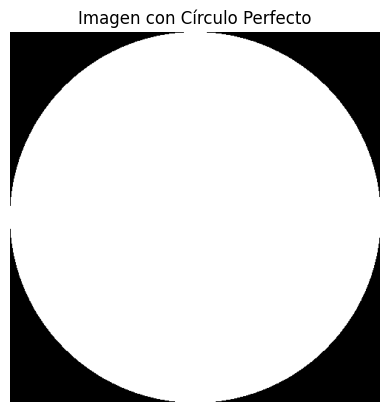

In [2]:
# Cargar y procesar la imagen
img_gray_circle = cv2.imread(circle_image_path, cv2.IMREAD_GRAYSCALE)
_, binary_circle = cv2.threshold(img_gray_circle, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_circle, cmap='gray')
plt.title("Imagen con Círculo Perfecto")
plt.axis('off')
plt.show()


In [3]:
# Estimación de π mediante simulación Monte Carlo
def estimate_pi(binary_img, num_points=100000):
    h, w = binary_img.shape
    x_rand = np.random.randint(0, w, size=num_points)
    y_rand = np.random.randint(0, h, size=num_points)
    inside = binary_img[y_rand, x_rand] == 255
    pi_est = 4 * np.sum(inside) / num_points
    return pi_est

# Ejecutar simulaciones
def run_pi_simulations(binary_img, num_points_list, num_trials=10):
    results = {}
    for n in num_points_list:
        estimates = [estimate_pi(binary_img, n) for _ in range(num_trials)]
        results[n] = estimates
    return results

num_points_list = [100, 1000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000, 10000000]
sim_results_circle = run_pi_simulations(binary_circle, num_points_list)

# Convertir a DataFrame
df_results_circle = pd.DataFrame(sim_results_circle)
df_results_circle


,100,1000,5000,10000,50000,100000,200000,500000,1000000,10000000
0,3.12,3.092,3.1768,3.1376,3.15112,3.15296,3.15810,3.156528,3.150864,3.151455
1,3.20,3.072,3.1336,3.1640,3.15320,3.15340,3.15164,3.149352,3.153584,3.150374
2,3.12,3.160,3.1688,3.1444,3.14792,3.13660,3.15322,3.151560,3.154720,3.151641
3,3.48,3.168,3.1736,3.1520,3.14280,3.16404,3.15820,3.151584,3.151548,3.152222
4,3.20,3.148,3.1448,3.1360,3.14944,3.14964,3.15482,3.148584,3.150300,3.151850
5,3.36,3.224,3.1376,3.1396,3.14408,3.16452,3.16166,3.152176,3.150792,3.152353
6,3.20,3.172,3.1880,3.1540,3.15064,3.15336,3.15448,3.151848,3.151404,3.152217
7,3.44,3.044,3.1536,3.1576,3.13576,3.14360,3.15338,3.145656,3.152396,3.151854
8,3.32,3.192,3.1472,3.1564,3.13120,3.14828,3.15136,3.152264,3.153400,3.151845
9,3.16,3.172,3.0824,3.1436,3.15688,3.15348,3.14952,3.156096,3.151616,3.150787


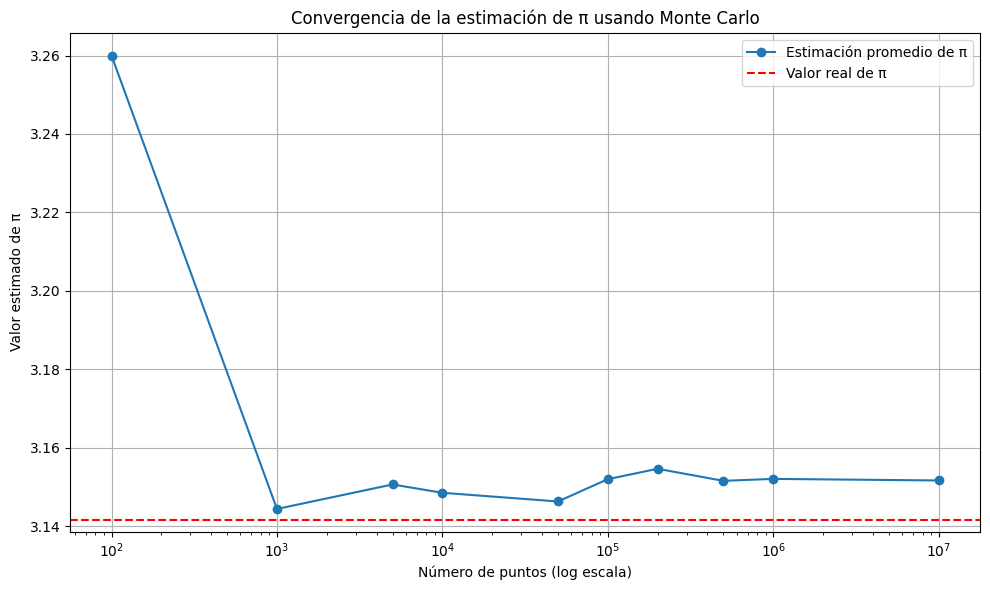

In [4]:
# Graficar convergencia
avg_estimates = df_results_circle.mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_estimates.index, avg_estimates.values, marker='o', linestyle='-', label='Estimación promedio de π')
plt.axhline(np.pi, color='red', linestyle='--', label='Valor real de π')
plt.xscale('log')
plt.xlabel('Número de puntos (log escala)')
plt.ylabel('Valor estimado de π')
plt.title('Convergencia de la estimación de π usando Monte Carlo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔄 Estimación alternativa de π con método cuadrático Monte Carlo
Usamos una función optimizada llamada `square_pi` que genera coordenadas aleatorias en el cuadrado [0,1]x[0,1] y estima π basándose en la proporción de puntos que caen dentro del cuarto de círculo de radio 1.

In [5]:
def square_pi(N):
    # square_pi(100000000) is fast and gives 4 digits. 
    xy = np.random.random((N, 2)) ** 2
    counts = np.sum((xy[:, 0] + xy[:, 1]) <= 1)
    print("pi was approximated at ::", 4 * counts / N)
    return 4 * counts / N

# Ejecutar con diferentes N
Ns = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
square_results = [square_pi(N) for N in Ns]


pi was approximated at :: 3.32
pi was approximated at :: 3.072
pi was approximated at :: 3.1804
pi was approximated at :: 3.1528
pi was approximated at :: 3.141504
pi was approximated at :: 3.141022
pi was approximated at :: 3.1413514
